In [1]:
# !pip install qiskit

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
from PIL import Image
style.use('default')

from qiskit import QuantumCircuit

#### Amplitude Encoding

In [3]:
def amplitude_encode_image(image, size):
    # Create a quantum circuit
    num_qubits = size * size
    qc = QuantumCircuit(num_qubits, num_qubits)

    # Amplitude encode each pixel value into the quantum state
    for i in range(size):
        for j in range(size):
            intensity = image[i, j]
            amplitude = np.sqrt(intensity / 256)  # Map intensity to amplitude
            qc.ry(2 * np.arcsin(amplitude), i * size + j)

    return qc

#### Angle Encoding

In [4]:
# def angle_encode_image(image, size):
#     # Create a quantum circuit
#     num_qubits = size * size
#     qc = QuantumCircuit(num_qubits, num_qubits)

#     # Angle encode each pixel value into the quantum state
#     for i in range(size):
#         for j in range(size):
#             intensity = image[i, j]
#             angle = intensity * (2 * np.pi / 256)  # Map intensity to angle
#             qc.ry(angle, i * size + j)


#     return qc

In [5]:
def angle_encode_image(image, size):
    # Create a quantum circuit
    qc = QuantumCircuit(size, size)

    # Angle encode pairs of pixel values into the quantum state
    for i in range(size):
        angle_rx=image[i,0]*(2*np.pi/255)
        angle_ry=image[i,1]*(2*np.pi/255)
        angle_rz=image[i,2]*(2*np.pi/255)
        angle_rx1=image[i,3]*(2*np.pi/255)

        qc.rx(angle_rx,i)
        qc.ry(angle_ry,i)
        qc.rz(angle_rz,i)
        qc.rx(angle_rx1,i)
    
    return qc

#### Load Image

In [6]:
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]+1, 32))
    plt.yticks(range(img.shape[1]+1, 32))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()

In [7]:
# Load Image
def load_image(img_path, image_size):
    # Load the image from filesystem
    image_raw = np.array(Image.open(img_path))
    print('Raw Image Info: ', image_raw.shape)
    print('Raw Image Datatype: ', image_raw.dtype)
    # Convert the RBG component of the image to B&W image, as a numpy (uint8) array
    image = []
    for i in range(image_size):
        image.append([])
        for j in range(image_size):
            image[i].append(image_raw[i][j][0] / 256)

    image = np.array(image)
    print('Image shape (numpy array): ', image.shape)

    # Display the image
    plt.title('Big Image')
    plt.xticks(range(0, image.shape[0]+1, 32))
    plt.yticks(range(0, image.shape[1]+1, 32))
    plt.imshow(image, extent=[0, image.shape[0],
                                image.shape[1], 0], cmap='viridis')
    plt.show()

    return image

#### Usage

Raw Image Info:  (28, 28, 2)
Raw Image Datatype:  uint8
Image shape (numpy array):  (28, 28)


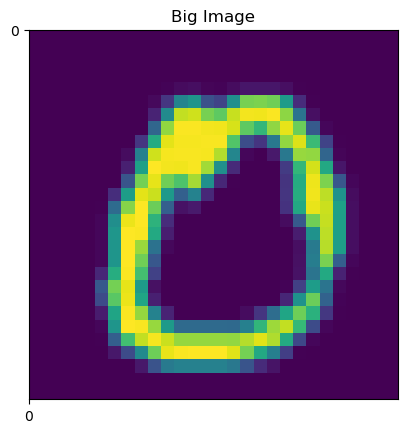

In [8]:
image_path = './assets/mnist-0-28.png'
image_size = 28  # Original Image-Width
image = load_image(image_path, image_size)


In [9]:
amplitude_encoded_circuit = amplitude_encode_image(image, size=image_size)
print(amplitude_encoded_circuit)

           ┌───────┐    
  q_0: ────┤ Ry(0) ├────
           ├───────┤    
  q_1: ────┤ Ry(0) ├────
           ├───────┤    
  q_2: ────┤ Ry(0) ├────
           ├───────┤    
  q_3: ────┤ Ry(0) ├────
           ├───────┤    
  q_4: ────┤ Ry(0) ├────
           ├───────┤    
  q_5: ────┤ Ry(0) ├────
           ├───────┤    
  q_6: ────┤ Ry(0) ├────
           ├───────┤    
  q_7: ────┤ Ry(0) ├────
           ├───────┤    
  q_8: ────┤ Ry(0) ├────
           ├───────┤    
  q_9: ────┤ Ry(0) ├────
           ├───────┤    
 q_10: ────┤ Ry(0) ├────
           ├───────┤    
 q_11: ────┤ Ry(0) ├────
           ├───────┤    
 q_12: ────┤ Ry(0) ├────
           ├───────┤    
 q_13: ────┤ Ry(0) ├────
           ├───────┤    
 q_14: ────┤ Ry(0) ├────
           ├───────┤    
 q_15: ────┤ Ry(0) ├────
           ├───────┤    
 q_16: ────┤ Ry(0) ├────
           ├───────┤    
 q_17: ────┤ Ry(0) ├────
           ├───────┤    
 q_18: ────┤ Ry(0) ├────
           ├───────┤    
 q_19: ────┤ Ry(0) ├────


In [10]:
angle_encoded_circuit = angle_encode_image(image, size=image_size)
print(angle_encoded_circuit)

      ┌───────┐┌───────┐┌───────┐┌───────┐
 q_0: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_1: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_2: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_3: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_4: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_5: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_6: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_7: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_8: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
 q_9: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
q_10: ┤ Rx(0) ├┤ Ry(0) ├┤ Rz(0) ├┤ Rx(0) ├
      ├───────┤├───────┤├───────┤├───────┤
q_11: ┤ Rx(

In [11]:
import scipy.io

# Load .mat file
mat_data = scipy.io.loadmat('./assets/MNIST_Train_Nox4x4.mat')

# Access variables in the .mat file
variable_name = 'V'
data = mat_data[variable_name]

In [12]:
test=data[0:6]

for i in test:
    qc=angle_encode_image(i,4)
    print(qc)

     ┌─────────────┐ ┌────────────┐┌───────────┐  ┌────────────┐
q_0: ┤ Rx(0.02464) ├─┤ Ry(1.5523) ├┤ Rz(2.119) ├──┤ Rx(1.1827) ├
     ├─────────────┤ ├────────────┤├───────────┴┐ └─┬───────┬──┘
q_1: ┤ Rx(0.02464) ├─┤ Ry(2.9814) ├┤ Rz(1.1334) ├───┤ Rx(0) ├───
     └──┬───────┬──┘┌┴────────────┤├────────────┤┌──┴───────┴──┐
q_2: ───┤ Rx(0) ├───┤ Ry(0.17248) ├┤ Rz(3.9917) ├┤ Rx(0.04928) ├
      ┌─┴───────┴─┐ └┬────────────┤├────────────┤└──┬───────┬──┘
q_3: ─┤ Rx(1.232) ├──┤ Ry(3.2525) ├┤ Rz(1.1334) ├───┤ Rx(0) ├───
      └───────────┘  └────────────┘└────────────┘   └───────┘   
c: 4/═══════════════════════════════════════════════════════════
                                                                
        ┌───────┐   ┌────────────┐┌────────────┐┌─────────────┐
q_0: ───┤ Rx(0) ├───┤ Ry(0.2464) ├┤ Rz(3.2278) ├┤ Rx(0.29568) ├
     ┌──┴───────┴──┐├────────────┤├───────────┬┘└┬────────────┤
q_1: ┤ Rx(0.04928) ├┤ Ry(3.2525) ├┤ Rz(8π/15) ├──┤ Rx(2.3654) ├
     └┬────────────┤├────────

In [14]:
print(data[0])

[[  1  63  86  48]
 [  1 121  46   0]
 [  0   7 162   2]
 [ 50 132  46   0]]
